In [1]:
##Classification tree
import os
import pandas as pd

In [2]:
os.getcwd()

'C:\\Users\\Darren savio dsouza'

In [3]:
os.chdir('C:/Users/Darren savio dsouza/Desktop/jigsaw/machine learning using python-tree model')

In [4]:
#default here is default of the credit card company.
dat=pd.read_csv("credit_history.csv")
dat.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [5]:
dat.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [6]:
#distribution of years column
dat['years'].describe()

count    7448.000000
mean        6.086332
std         6.700758
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        62.000000
Name: years, dtype: float64

In [7]:
#replace the missing value with the median of my data
dat['years'].fillna(4,inplace=True)

In [8]:
dat.isnull().sum()

default      0
amount       0
grade        0
years        0
ownership    0
income       0
age          0
dtype: int64

In [9]:
#we will now create a predictor matrix, we remove the default column
X=dat.drop('default',axis=1)

In [10]:
X.head()

,amount,grade,years,ownership,income,age
0,1000,B,2.0,RENT,19200.0,24
1,6500,A,2.0,MORTGAGE,66000.0,28
2,2400,A,2.0,RENT,60000.0,36
3,10000,C,3.0,RENT,62000.0,24
4,4000,C,2.0,RENT,20000.0,28


In [11]:
#now if you see the head we have few non numeric values in grade and owenership
#we will have to create a numeric representation for a non numeric value
X=pd.get_dummies(X)

In [12]:
X.head()

,amount,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,1000,2.0,19200.0,24,0,1,0,0,0,0,0,0,0,0,1
1,6500,2.0,66000.0,28,1,0,0,0,0,0,0,1,0,0,0
2,2400,2.0,60000.0,36,1,0,0,0,0,0,0,0,0,0,1
3,10000,3.0,62000.0,24,0,0,1,0,0,0,0,0,0,0,1
4,4000,2.0,20000.0,28,0,0,1,0,0,0,0,0,0,0,1


In [13]:
#we will create the target vector,since we are predicting the default column
y=dat['default']
print(y)

0       0
1       1
2       0
3       0
4       1
5       1
6       1
7       0
8       0
9       0
10      1
11      0
12      1
13      0
14      1
15      1
16      1
17      0
18      1
19      0
20      0
21      1
22      0
23      0
24      1
25      0
26      0
27      0
28      0
29      0
       ..
7697    1
7698    1
7699    0
7700    1
7701    1
7702    0
7703    1
7704    1
7705    0
7706    1
7707    1
7708    1
7709    0
7710    1
7711    1
7712    0
7713    0
7714    1
7715    1
7716    1
7717    1
7718    0
7719    0
7720    0
7721    1
7722    1
7723    1
7724    1
7725    1
7726    1
Name: default, Length: 7727, dtype: int64


In [14]:
#within the model selection module we have the train and test split method  ??
#we need to create train and split data sets
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

In [15]:
#now we need to import the tree module-sklearn.tree
import sklearn.tree as tree
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

#if you see the accuracy of the test set is around 62%.

0.6274256144890039

In [16]:
#area under the curve   ??  https://stackabuse.com/understanding-roc-curves-with-python/
#it accepts two parameter the actual labels and the predicted probability from the decision tree model
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

#it turns out to be 0.67 which more than 0.50

0.6721250820352787

In [17]:
#so we can can say that the decision tree model is better than naiveclassifier

In [18]:
import pydotplus

In [19]:
#once we have created the decision tree model. We will want to visulaize the model
#use conda install package-to-install in anaconda prompt to install the package
#conda install -c anaconda graphviz - in command promt
#we can check it in https://docs.anaconda.com/anaconda-cloud/user-guide/howto/#use-packages as well for clarifictaion
import pydotplus
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/' --#i have ignored this ,
#as i have manually setted the path in the system.steps are mentioned below  as header
#binaries of the Graphviz are not appended to the 'PATH' variable
#either you can manually append  the binaries of the Graphviz installation to your path variable

SyntaxError: invalid syntax (<ipython-input-19-34f454d0f18f>, line 6)

In [20]:
dot_data= tree.export_graphviz(clf,out_file=None,
                              feature_names=X.columns,
                              class_names=['0','1'],
                              filled=True, rounded=True,
                              special_characters=True,proportion=True)

In [21]:
graph=pydotplus.graph_from_dot_data(dot_data)

In [22]:
from IPython.display import Image

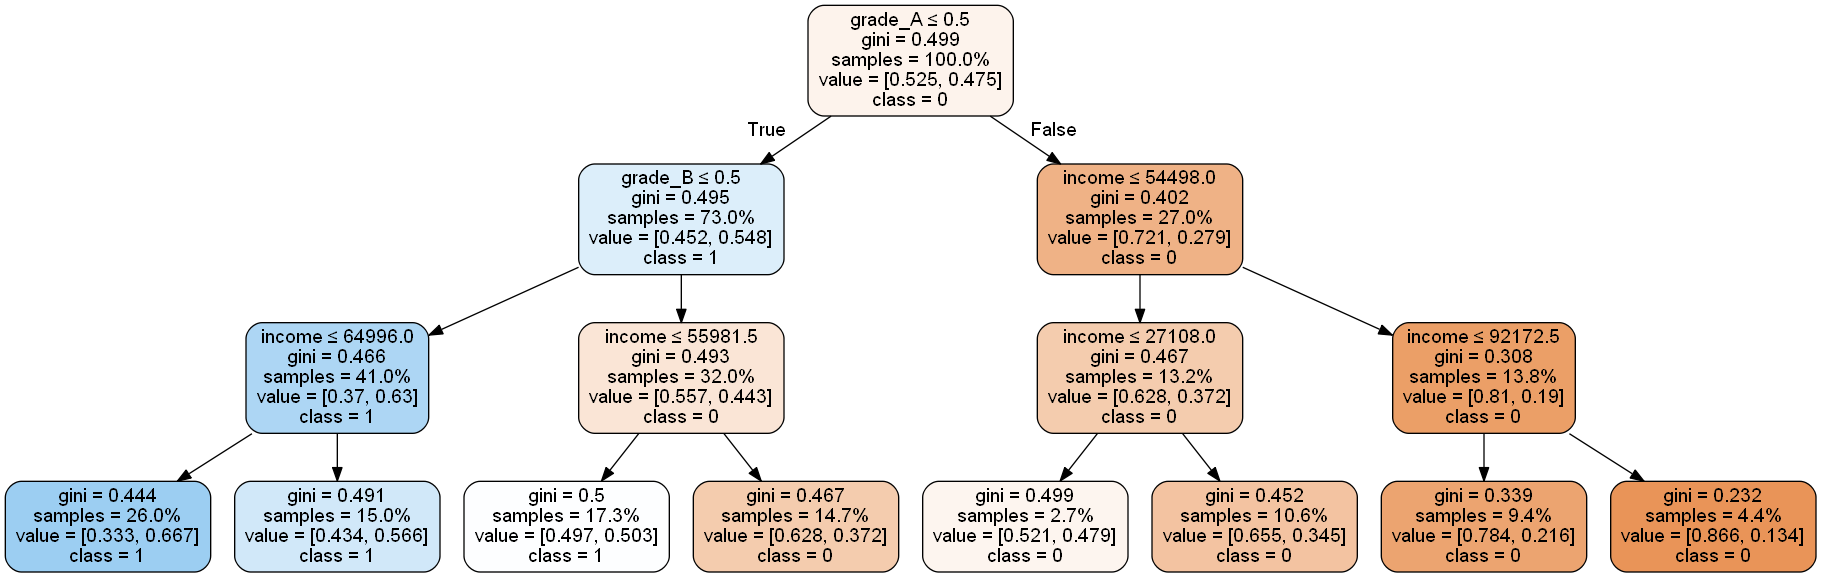

In [23]:
Image(graph.create_png())



#The problem is that the path to GraphViz was not found by the pydot module as shown in the traceback:
'GraphViz\'s executables not found'
I solved this problem on my windows 7 machine by adding the GraphViz bin directory to my computer's PATH. Then restarting my python IDE to use the updated path.
Install GraphViz if you haven't already (I used the MSI download)
Get the path for gvedit.exe (for me it was "C:\Program Files (x86)\Graphviz2.34\bin\")
Add this path to the computer's PATH
One way to get to environment settings to set your path is to click on each of these button/menu options: start->computer->system properties->advanced settings->environment variables
Click Edit User path
Add this string to the end of your Variable value list (including semicolon): ;C:\Program Files (x86)\Graphviz2.34\bin
Click OK
Restart your Python IDE

In [24]:
gvedit.exe-#not required as i hav manuall set gthe path as per the steps above

SyntaxError: invalid syntax (<ipython-input-24-2e4cf52e5078>, line 1)

In [25]:
#Grid search cross validation
#decision tree classifier can take many parameters , we can do that doing the grid search cross validation


In [26]:
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)

In [27]:
#grid search on the max_depth
mod=model_selection.GridSearchCV(clf,param_grid={'max_depth':[2,3,4,5,6]})
mod.fit(X_train,y_train)

C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=200,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [2, 3, 4, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [28]:
mod.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=200, splitter='best')

In [29]:
mod.best_score_

0.6314512214851966

In [30]:
### Regression tree

In [31]:
import os
import pandas as pd

In [32]:
os.chdir('C:/Users/Darren savio dsouza/Desktop/jigsaw/machine learning using python-tree model')

In [33]:
dat=pd.read_csv("dm.csv")

In [34]:
dat.head()
#this data set is from a e-retailer

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [35]:
dat.columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'History', 'Catalogs', 'AmountSpent', 'Cust_Id'],
      dtype='object')

In [36]:
dat.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
Cust_Id          0
dtype: int64

In [37]:
#this e retailer wants to predeict the amount spent column
#since amount spent column is a continous variable we use decision tree regressor 
#we need to create a predictor matrix, so we need to remove the amount variable and custo_id as theyr are not required in the pred matrix
X=dat.drop(['Cust_Id','AmountSpent'],axis=1)

In [38]:
X.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs
0,Old,Female,Own,Single,Far,47500,0,High,6
1,Middle,Male,Rent,Single,Close,63600,0,High,6
2,Young,Female,Rent,Single,Close,13500,0,Low,18
3,Middle,Male,Own,Married,Close,85600,1,High,18
4,Middle,Female,Own,Single,Close,68400,0,High,12


In [39]:
#so now we need to remove the  non numeric valuesa dn convert it into numeric representation
X=pd.get_dummies(X)

In [40]:
X.head()

,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
0,47500,0,6,0,1,0,1,0,1,0,0,1,0,1,1,0,0
1,63600,0,6,1,0,0,0,1,0,1,0,1,1,0,1,0,0
2,13500,0,18,0,0,1,1,0,0,1,0,1,1,0,0,1,0
3,85600,1,18,1,0,0,0,1,1,0,1,0,1,0,1,0,0
4,68400,0,12,1,0,0,1,0,1,0,0,1,1,0,1,0,0


In [41]:
#now we need to create the target vector
y=dat['AmountSpent']

In [42]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

In [43]:
#now we create the decision tree regressor
import sklearn.tree as tree
reg=tree.DecisionTreeRegressor(max_depth=3)
reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [44]:
#now we use the regression score in the test data set
reg.score(X_test,y_test)

0.5915701153457273

In [45]:
#the above value give the mean square error on the test data
#we can also print out which predictors are important, by printing their feature importances
reg.feature_importances_

array([0.68060902, 0.        , 0.17771448, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03685946,
       0.04537282, 0.05944422])

In [46]:
#a better way to represent a feature importance is to create a series object out of the above numpy array
#also provide a name with corresponding to the values of each feature importances given above

pd.Series(reg.feature_importances_,index=X.columns).sort_values(ascending=False).head(5)

Salary            0.680609
Catalogs          0.177714
History_Medium    0.059444
History_Low       0.045373
History_High      0.036859
dtype: float64

In [47]:
import pydotplus
#we need to set the path if its not set

In [48]:
dot_data=tree.export_graphviz(reg,out_file=None,
                             feature_names=X.columns,
                             filled=True, rounded=True,
                             special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)

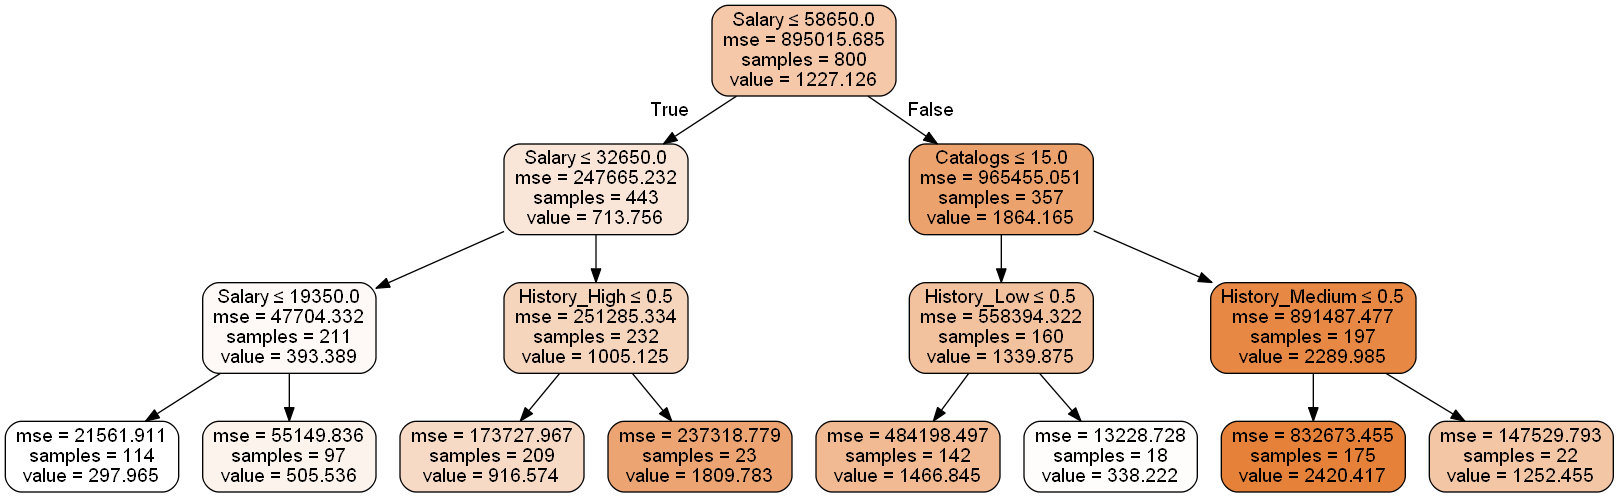

In [49]:
from IPython.display import Image
Image(graph.create_png())

In [50]:
#'value' abovein the tree shows the average value of the target variable
#regression tree model are use in the business settings to create segments in data in the data.


#so in the excel if we see the average amount spent which is more than the global amount spent has total of 3 values 

In [51]:
#case study-graded assignment
import os
import pandas as pd
import json

In [52]:
os.getcwd()

'C:\\Users\\Darren savio dsouza\\Desktop\\jigsaw\\machine learning using python-tree model'

In [53]:
os.chdir("C:/Users/Darren savio dsouza/Desktop/jigsaw/machine learning using python-tree model/graded assignment")

In [81]:
import json
student = '{"name": "Rajesh", "roll" : "52", "subject": ["English", "Science"]}'
student_loaded = json.loads(student)
print(student_loaded)
print(student_loaded['roll'])

{'name': 'Rajesh', 'roll': '52', 'subject': ['English', 'Science']}
52


In [54]:
with open('amsterdam.json') as json_file:
    data = json.load(json_file)


In [55]:
data

{'host_listings_count': {'0': 1.0,
  '1': 1.0,
  '2': 1.0,
  '3': 2.0,
  '4': 1.0,
  '5': 1.0,
  '6': 1.0,
  '7': 1.0,
  '8': 3.0,
  '9': 1.0,
  '10': 1.0,
  '11': 1.0,
  '12': 1.0,
  '13': 1.0,
  '14': 1.0,
  '15': 1.0,
  '16': 1.0,
  '17': 1.0,
  '18': 2.0,
  '19': 1.0,
  '20': 1.0,
  '21': 1.0,
  '22': 1.0,
  '23': 3.0,
  '24': 1.0,
  '25': 1.0,
  '26': 1.0,
  '27': 1.0,
  '28': 1.0,
  '29': 1.0,
  '30': 1.0,
  '31': 1.0,
  '32': 2.0,
  '33': 1.0,
  '34': 3.0,
  '35': 1.0,
  '36': 1.0,
  '37': 1.0,
  '38': 24.0,
  '39': 1.0,
  '40': 1.0,
  '41': 1.0,
  '42': 1.0,
  '43': 2.0,
  '44': 1.0,
  '45': 1.0,
  '46': 36.0,
  '47': 1.0,
  '48': 1.0,
  '49': 1.0,
  '50': 1.0,
  '51': 1.0,
  '52': 1.0,
  '53': 1.0,
  '54': 1.0,
  '55': 2.0,
  '56': 1.0,
  '57': 2.0,
  '58': 1.0,
  '59': 1.0,
  '60': 1.0,
  '61': 1.0,
  '62': 2.0,
  '63': 1.0,
  '64': 1.0,
  '65': 7.0,
  '66': 1.0,
  '67': 1.0,
  '68': 1.0,
  '69': 1.0,
  '70': 1.0,
  '71': 1.0,
  '72': 1.0,
  '73': 29.0,
  '74': 1.0,
  '75': 1

In [56]:
from pandas import Series,DataFrame

In [57]:
dat1=DataFrame(data)
    

In [58]:
dat1

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable
0,1.0,6,1.0,2.0,1,3,4,1,$145.00,52.361173,4.866755,Entire home/apt,f
1,1.0,2,1.0,1.0,1,2,17,1,$88.00,52.370237,4.859507,Entire home/apt,f
10,1.0,2,1.0,1.0,1,3,0,1,$130.00,52.371424,4.848644,Entire home/apt,f
100,1.0,5,1.0,4.0,1,5,2,1,$90.00,52.312889,4.980151,Entire home/apt,f
1000,1.0,1,1.0,1.0,1,1,32,1,$39.00,52.395334,4.916701,Private room,t
10000,1.0,3,1.0,2.0,1,2,3,1,$118.00,52.347202,4.846432,Entire home/apt,f
10001,34.0,4,1.0,2.0,1,2,5,31,$129.00,52.344071,4.868194,Entire home/apt,t
10002,1.0,4,1.0,3.0,1,2,10,1,$130.00,52.345653,4.869328,Entire home/apt,t
10003,1.0,4,1.0,1.0,1,3,16,1,$135.00,52.347393,4.875956,Private room,f
10004,1.0,2,1.0,1.0,1,1,0,1,$94.00,52.350096,4.849824,Entire home/apt,f


In [59]:
dat1.columns

Index(['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'guests_included', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'price', 'latitude', 'longitude',
       'room_type', 'instant_bookable'],
      dtype='object')

In [60]:
dat1.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,latitude,longitude
count,15178.000000,15181.000000,15163.000000,15169.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000
mean,3.404994,2.917858,1.122832,1.412222,1.516106,2.882551,17.785456,2.934787,52.365353,4.889025
std,11.324173,1.404973,0.356547,0.885127,1.004709,7.215722,34.747999,8.968696,0.015738,0.034901
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,52.290308,4.753513
25%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,52.355616,4.865016
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,7.000000,1.000000,52.365028,4.886344
75%,1.000000,4.000000,1.000000,2.000000,2.000000,3.000000,18.000000,1.000000,52.374829,4.907857
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.000000,496.000000,91.000000,52.426224,5.027689


In [61]:
dat1.count()

host_listings_count               15178
accommodates                      15181
bathrooms                         15163
bedrooms                          15169
guests_included                   15181
minimum_nights                    15181
number_of_reviews                 15181
calculated_host_listings_count    15181
price                             15181
latitude                          15181
longitude                         15181
room_type                         15181
instant_bookable                  15181
dtype: int64

In [62]:
dat1.shape

(15181, 13)

In [63]:
dat1.isnull().sum()

host_listings_count                3
accommodates                       0
bathrooms                         18
bedrooms                          12
guests_included                    0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
price                              0
latitude                           0
longitude                          0
room_type                          0
instant_bookable                   0
dtype: int64

In [64]:
dat1["latitude"]

0        52.361173
1        52.370237
10       52.371424
100      52.312889
1000     52.395334
10000    52.347202
10001    52.344071
10002    52.345653
10003    52.347393
10004    52.350096
10005    52.352727
10006    52.347000
10007    52.349061
10008    52.354826
10009    52.356436
1001     52.398657
10010    52.358714
10011    52.357034
10012    52.352460
10013    52.352637
10014    52.355270
10015    52.354253
10016    52.357430
10017    52.351354
10018    52.353511
10019    52.358680
1002     52.384754
10020    52.353487
10021    52.352658
10022    52.355199
           ...    
9972     52.342956
9973     52.349492
9974     52.350315
9975     52.359907
9976     52.356936
9977     52.355063
9978     52.348167
9979     52.344337
998      52.398871
9980     52.338479
9981     52.355604
9982     52.346842
9983     52.350422
9984     52.343273
9985     52.349665
9986     52.350644
9987     52.353597
9988     52.356375
9989     52.351666
999      52.384035
9990     52.354948
9991     52.

In [65]:
dat1.dtypes

host_listings_count               float64
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
guests_included                     int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
price                              object
latitude                          float64
longitude                         float64
room_type                          object
instant_bookable                   object
dtype: object

In [66]:
dat1.price=pd.to_numeric(dat1.price)



ValueError: Unable to parse string "$145.00" at position 0

In [67]:
dat1.price

0        $145.00
1         $88.00
10       $130.00
100       $90.00
1000      $39.00
10000    $118.00
10001    $129.00
10002    $130.00
10003    $135.00
10004     $94.00
10005    $110.00
10006    $120.00
10007     $60.00
10008     $95.00
10009    $125.00
1001      $90.00
10010    $180.00
10011    $138.00
10012    $130.00
10013    $185.00
10014     $95.00
10015     $75.00
10016     $65.00
10017    $100.00
10018     $99.00
10019    $175.00
1002     $110.00
10020    $125.00
10021    $110.00
10022    $130.00
          ...   
9972     $109.00
9973      $55.00
9974     $125.00
9975     $150.00
9976     $160.00
9977     $250.00
9978      $89.00
9979     $200.00
998       $60.00
9980     $260.00
9981     $150.00
9982     $550.00
9983     $280.00
9984      $85.00
9985     $115.00
9986      $85.00
9987      $90.00
9988      $95.00
9989      $80.00
999      $420.00
9990     $150.00
9991      $70.00
9992     $140.00
9993     $175.00
9994     $270.00
9995     $105.00
9996     $150.00
9997     $320.

In [68]:
dat1['price']=dat1['price'].str.replace('$',"")
dat1['price']=dat1['price'].str.replace(',',"")

In [69]:
print(dat1.head())

      host_listings_count  accommodates  bathrooms  bedrooms  guests_included  \
0                     1.0             6        1.0       2.0                1   
1                     1.0             2        1.0       1.0                1   
10                    1.0             2        1.0       1.0                1   
100                   1.0             5        1.0       4.0                1   
1000                  1.0             1        1.0       1.0                1   

      minimum_nights  number_of_reviews  calculated_host_listings_count  \
0                  3                  4                               1   
1                  2                 17                               1   
10                 3                  0                               1   
100                5                  2                               1   
1000               1                 32                               1   

       price   latitude  longitude        room_type instant_bo

In [70]:
dat1.price=pd.to_numeric(dat1.price)

In [71]:
dat1['price'].mean()

134.79922271260128

In [72]:
round(dat1['price'].mean(),3)

134.799

In [73]:
dat1["price"].max()

3142.0

In [74]:
dat1.groupby('host_listings_count',as_index=False).sort_values('price',ascending=False).head()

AttributeError: Cannot access callable attribute 'sort_values' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [75]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import os

In [76]:
dat1.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude
count,15178.000000,15181.000000,15163.000000,15169.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000
mean,3.404994,2.917858,1.122832,1.412222,1.516106,2.882551,17.785456,2.934787,134.799223,52.365353,4.889025
std,11.324173,1.404973,0.356547,0.885127,1.004709,7.215722,34.747999,8.968696,85.751273,0.015738,0.034901
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,19.000000,52.290308,4.753513
25%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,90.000000,52.355616,4.865016
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,7.000000,1.000000,118.000000,52.365028,4.886344
75%,1.000000,4.000000,1.000000,2.000000,2.000000,3.000000,18.000000,1.000000,150.000000,52.374829,4.907857
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.000000,496.000000,91.000000,3142.000000,52.426224,5.027689


In [77]:
dat1.describe(percentiles=[.99])

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude
count,15178.000000,15181.000000,15163.000000,15169.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000,15181.000000
mean,3.404994,2.917858,1.122832,1.412222,1.516106,2.882551,17.785456,2.934787,134.799223,52.365353,4.889025
std,11.324173,1.404973,0.356547,0.885127,1.004709,7.215722,34.747999,8.968696,85.751273,0.015738,0.034901
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,19.000000,52.290308,4.753513
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,7.000000,1.000000,118.000000,52.365028,4.886344
99%,47.000000,8.000000,2.500000,4.000000,5.000000,14.000000,173.200000,45.000000,440.000000,52.408910,4.996097
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.000000,496.000000,91.000000,3142.000000,52.426224,5.027689


In [78]:
dat1.groupby("price"<= 440).shape[0]

TypeError: '<=' not supported between instances of 'str' and 'int'

In [79]:
dat1[dat1['price']<=440].shape[0]

15031

In [80]:
dat1.dtypes

host_listings_count               float64
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
guests_included                     int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
price                             float64
latitude                          float64
longitude                         float64
room_type                          object
instant_bookable                   object
dtype: object

In [81]:
dat2=dat1[dat1['price']<=440]

In [82]:
dat2.describe(percentiles=[.90])

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude
count,15028.000000,15031.000000,15013.000000,15019.000000,15031.000000,15031.00000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000
mean,3.368978,2.879383,1.116099,1.390439,1.498902,2.88364,17.842459,2.901603,129.974386,52.365318,4.889023
std,11.192743,1.300451,0.343436,0.839198,0.939973,7.24457,34.868321,8.826702,63.799025,0.015759,0.035005
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,1.000000,19.000000,52.290308,4.753513
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.00000,7.000000,1.000000,115.000000,52.364970,4.886354
90%,3.000000,4.000000,1.500000,2.000000,2.000000,4.00000,43.000000,3.000000,210.000000,52.383550,4.934756
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.00000,496.000000,91.000000,440.000000,52.426224,5.027689


In [83]:
dat1.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable
0,1.0,6,1.0,2.0,1,3,4,1,145.0,52.361173,4.866755,Entire home/apt,f
1,1.0,2,1.0,1.0,1,2,17,1,88.0,52.370237,4.859507,Entire home/apt,f
10,1.0,2,1.0,1.0,1,3,0,1,130.0,52.371424,4.848644,Entire home/apt,f
100,1.0,5,1.0,4.0,1,5,2,1,90.0,52.312889,4.980151,Entire home/apt,f
1000,1.0,1,1.0,1.0,1,1,32,1,39.0,52.395334,4.916701,Private room,t


In [84]:
dat1.isnull().sum()

host_listings_count                3
accommodates                       0
bathrooms                         18
bedrooms                          12
guests_included                    0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
price                              0
latitude                           0
longitude                          0
room_type                          0
instant_bookable                   0
dtype: int64

In [85]:
dat2.isnull().sum()

host_listings_count                3
accommodates                       0
bathrooms                         18
bedrooms                          12
guests_included                    0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
price                              0
latitude                           0
longitude                          0
room_type                          0
instant_bookable                   0
dtype: int64

In [86]:
dat2["host_listings_count"].unique().tolist()

[1.0,
 34.0,
 2.0,
 5.0,
 27.0,
 36.0,
 13.0,
 24.0,
 4.0,
 12.0,
 3.0,
 16.0,
 43.0,
 6.0,
 106.0,
 103.0,
 32.0,
 47.0,
 29.0,
 9.0,
 0.0,
 7.0,
 25.0,
 10.0,
 15.0,
 18.0,
 11.0,
 28.0,
 8.0,
 21.0,
 22.0,
 nan,
 45.0]

In [87]:
dat2["bathrooms"].unique().tolist()

[1.0, 1.5, 2.5, 2.0, nan, 0.5, 0.0, 3.0, 3.5, 4.0, 8.0, 4.5, 5.0]

In [88]:
dat2["bedrooms"].unique().tolist()

[2.0, 1.0, 4.0, 3.0, 0.0, 5.0, nan, 6.0, 8.0, 9.0, 7.0, 10.0]

In [89]:
dat2.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude
count,15028.000000,15031.000000,15013.000000,15019.000000,15031.000000,15031.00000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000
mean,3.368978,2.879383,1.116099,1.390439,1.498902,2.88364,17.842459,2.901603,129.974386,52.365318,4.889023
std,11.192743,1.300451,0.343436,0.839198,0.939973,7.24457,34.868321,8.826702,63.799025,0.015759,0.035005
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,1.000000,19.000000,52.290308,4.753513
25%,1.000000,2.000000,1.000000,1.000000,1.000000,2.00000,2.000000,1.000000,89.000000,52.355591,4.864840
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.00000,7.000000,1.000000,115.000000,52.364970,4.886354
75%,1.000000,4.000000,1.000000,2.000000,2.000000,3.00000,18.000000,1.000000,150.000000,52.374814,4.907945
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.00000,496.000000,91.000000,440.000000,52.426224,5.027689


In [90]:
dat2["host_listings_count"].shape[0]

15031

In [91]:
dat2[dat2['host_listings_count']!="nan"].shape[0]


C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


15031

In [92]:
dat2.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude
count,15028.000000,15031.000000,15013.000000,15019.000000,15031.000000,15031.00000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000
mean,3.368978,2.879383,1.116099,1.390439,1.498902,2.88364,17.842459,2.901603,129.974386,52.365318,4.889023
std,11.192743,1.300451,0.343436,0.839198,0.939973,7.24457,34.868321,8.826702,63.799025,0.015759,0.035005
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,1.000000,19.000000,52.290308,4.753513
25%,1.000000,2.000000,1.000000,1.000000,1.000000,2.00000,2.000000,1.000000,89.000000,52.355591,4.864840
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.00000,7.000000,1.000000,115.000000,52.364970,4.886354
75%,1.000000,4.000000,1.000000,2.000000,2.000000,3.00000,18.000000,1.000000,150.000000,52.374814,4.907945
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.00000,496.000000,91.000000,440.000000,52.426224,5.027689


In [93]:
dat2["host_listings_count"].shape[0]

15031

In [94]:
dat2.dropna(inplace=True)

C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
dat2.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,3.372316,2.880317,1.116215,1.390919,1.499333,2.885051,17.797440,2.904654,130.050273,52.365312,4.889033
std,11.203593,1.298492,0.343442,0.839649,0.940643,7.252271,34.766613,8.836070,63.820328,0.015765,0.035010
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,19.000000,52.290308,4.753513
25%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,89.000000,52.355582,4.864839
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,7.000000,1.000000,115.000000,52.364960,4.886370
75%,1.000000,4.000000,1.000000,2.000000,2.000000,3.000000,18.000000,1.000000,150.000000,52.374805,4.907953
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.000000,496.000000,91.000000,440.000000,52.426224,5.027689


In [96]:
dat2.isnull().sum()

host_listings_count               0
accommodates                      0
bathrooms                         0
bedrooms                          0
guests_included                   0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
price                             0
latitude                          0
longitude                         0
room_type                         0
instant_bookable                  0
dtype: int64

In [97]:
dat2.shape[0]

14998

In [98]:
#You can assume that the city centre has a latitude = 52.379189 and longitude = 4.899431

In [99]:
dat2.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,3.372316,2.880317,1.116215,1.390919,1.499333,2.885051,17.797440,2.904654,130.050273,52.365312,4.889033
std,11.203593,1.298492,0.343442,0.839649,0.940643,7.252271,34.766613,8.836070,63.820328,0.015765,0.035010
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,19.000000,52.290308,4.753513
25%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,89.000000,52.355582,4.864839
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,7.000000,1.000000,115.000000,52.364960,4.886370
75%,1.000000,4.000000,1.000000,2.000000,2.000000,3.000000,18.000000,1.000000,150.000000,52.374805,4.907953
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.000000,496.000000,91.000000,440.000000,52.426224,5.027689


In [100]:
dat2["latitude1"]=52.379189
dat2["longitude1"]=4.899431

C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [101]:
dat2.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,latitude1,longitude1
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,1.499800e+04,1.499800e+04
mean,3.372316,2.880317,1.116215,1.390919,1.499333,2.885051,17.797440,2.904654,130.050273,52.365312,4.889033,5.237919e+01,4.899431e+00
std,11.203593,1.298492,0.343442,0.839649,0.940643,7.252271,34.766613,8.836070,63.820328,0.015765,0.035010,6.679324e-13,7.745174e-13
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,19.000000,52.290308,4.753513,5.237919e+01,4.899431e+00
25%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,89.000000,52.355582,4.864839,5.237919e+01,4.899431e+00
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,7.000000,1.000000,115.000000,52.364960,4.886370,5.237919e+01,4.899431e+00
75%,1.000000,4.000000,1.000000,2.000000,2.000000,3.000000,18.000000,1.000000,150.000000,52.374805,4.907953,5.237919e+01,4.899431e+00
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.000000,496.000000,91.000000,440.000000,52.426224,5.027689,5.237919e+01,4.899431e+00


In [102]:
dat2.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable,latitude1,longitude1
0,1.0,6,1.0,2.0,1,3,4,1,145.0,52.361173,4.866755,Entire home/apt,f,52.379189,4.899431
1,1.0,2,1.0,1.0,1,2,17,1,88.0,52.370237,4.859507,Entire home/apt,f,52.379189,4.899431
10,1.0,2,1.0,1.0,1,3,0,1,130.0,52.371424,4.848644,Entire home/apt,f,52.379189,4.899431
100,1.0,5,1.0,4.0,1,5,2,1,90.0,52.312889,4.980151,Entire home/apt,f,52.379189,4.899431
1000,1.0,1,1.0,1.0,1,1,32,1,39.0,52.395334,4.916701,Private room,t,52.379189,4.899431


In [103]:
import math

In [104]:

#from math import radians, cos, sin, asin, sqrt
#def haversine(longitude, latitude, longitude1, latitude1):
 #   """
  #  Calculate the great circle distance between two points 
   # on the earth (specified in decimal degrees)
    #"""
    # convert decimal degrees to radians 
    #longitude, latitude, longitude1, latitude1 = map(radians, [longitude, latitude, longitude1, latitude1])
    # haversine formula 
    #dlon = longitude1 - longitude 
    #dlat = latitude1 - latitude 
    #a = sin(dlat/2)**2 + cos(latitude) * cos(latitude1) * sin(dlon/2)**2
    #c = 2 * asin(sqrt(a)) 
    #km = 6367 * c
    #return km




In [105]:
import numpy as np
def haversine_np(longitude, latitude, longitude1, latitude1):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    
    All args must be of equal length.
    
    """
    # convert decimal degrees to radians 
    longitude, latitude, longitude1, latitude1 = map(np.radians, [longitude, latitude, longitude1, latitude1])
    # haversine formula 
    dlon = longitude1 - longitude 
    dlat = latitude1 - latitude 
    a = np.sin(dlat/2.0)**2 + np.cos(latitude) * np.cos(latitude1) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    km = 6367 * c
    return km


In [106]:
dat2['d_center'] = haversine_np(dat2['longitude'],dat2['latitude'],dat2['longitude1'],dat2['latitude1'])

C:\Users\Darren savio dsouza\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [107]:
dat2.describe()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,latitude1,longitude1,d_center
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,1.499800e+04,1.499800e+04,14998.000000
mean,3.372316,2.880317,1.116215,1.390919,1.499333,2.885051,17.797440,2.904654,130.050273,52.365312,4.889033,5.237919e+01,4.899431e+00,2.998582
std,11.203593,1.298492,0.343442,0.839649,0.940643,7.252271,34.766613,8.836070,63.820328,0.015765,0.035010,6.679324e-13,7.745174e-13,1.610995
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,19.000000,52.290308,4.753513,5.237919e+01,4.899431e+00,0.115801
25%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,89.000000,52.355582,4.864839,5.237919e+01,4.899431e+00,1.948924
50%,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,7.000000,1.000000,115.000000,52.364960,4.886370,5.237919e+01,4.899431e+00,2.841338
75%,1.000000,4.000000,1.000000,2.000000,2.000000,3.000000,18.000000,1.000000,150.000000,52.374805,4.907953,5.237919e+01,4.899431e+00,3.577086
max,106.000000,17.000000,8.000000,10.000000,16.000000,523.000000,496.000000,91.000000,440.000000,52.426224,5.027689,5.237919e+01,4.899431e+00,11.842162


In [108]:
dat2.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable,latitude1,longitude1,d_center
0,1.0,6,1.0,2.0,1,3,4,1,145.0,52.361173,4.866755,Entire home/apt,f,52.379189,4.899431,2.987199
1,1.0,2,1.0,1.0,1,2,17,1,88.0,52.370237,4.859507,Entire home/apt,f,52.379189,4.899431,2.885443
10,1.0,2,1.0,1.0,1,3,0,1,130.0,52.371424,4.848644,Entire home/apt,f,52.379189,4.899431,3.551815
100,1.0,5,1.0,4.0,1,5,2,1,90.0,52.312889,4.980151,Entire home/apt,f,52.379189,4.899431,9.181975
1000,1.0,1,1.0,1.0,1,1,32,1,39.0,52.395334,4.916701,Private room,t,52.379189,4.899431,2.142603


In [109]:
dat2.sort_values("d_center",ascending=True).head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable,latitude1,longitude1,d_center
3158,1.0,2,1.5,1.0,1,1,0,1,85.0,52.378546,4.900775,Private room,f,52.379189,4.899431,0.115801
3168,1.0,4,1.0,1.0,1,1,0,1,41.0,52.378850,4.901433,Shared room,f,52.379189,4.899431,0.140946
2639,1.0,4,1.0,1.0,2,3,27,1,159.0,52.379089,4.897293,Entire home/apt,f,52.379189,4.899431,0.145468
3010,4.0,2,1.0,1.0,1,1,4,4,150.0,52.378549,4.896679,Private room,t,52.379189,4.899431,0.199767
1860,1.0,2,1.0,1.0,1,1,9,1,120.0,52.378398,4.896674,Private room,f,52.379189,4.899431,0.206638


In [110]:
dat2.sort_values("d_center",ascending=False)

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable,latitude1,longitude1,d_center
6764,1.0,3,1.0,3.0,1,30,0,1,83.0,52.302752,5.020968,Entire home/apt,f,52.379189,4.899431,11.842162
6766,1.0,2,1.0,1.0,1,2,5,1,50.0,52.291664,4.992333,Private room,f,52.379189,4.899431,11.592780
6791,1.0,2,1.0,1.0,1,1,22,1,50.0,52.292890,4.995102,Private room,t,52.379189,4.899431,11.583068
6779,1.0,4,1.0,3.0,1,3,1,1,101.0,52.292209,4.989963,Entire home/apt,f,52.379189,4.899431,11.454847
6804,1.0,3,1.0,1.0,2,2,37,1,40.0,52.290687,4.983784,Private room,f,52.379189,4.899431,11.381113
6797,1.0,1,1.0,1.0,1,1,44,1,38.0,52.298440,5.000180,Private room,t,52.379189,4.899431,11.283228
6786,1.0,3,1.0,1.0,2,2,3,1,35.0,52.291462,4.982388,Private room,f,52.379189,4.899431,11.259013
6759,1.0,3,1.0,1.0,1,1,0,1,84.0,52.290308,4.978471,Private room,f,52.379189,4.899431,11.240968
6801,1.0,3,1.5,1.0,2,1,0,1,65.0,52.296297,4.992101,Private room,f,52.379189,4.899431,11.155282
6782,2.0,1,2.0,1.0,1,1,2,2,60.0,52.297613,4.994682,Private room,f,52.379189,4.899431,11.135626


In [111]:
dat2["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [112]:
pr=dat2[(dat2["room_type"]=="Private room") & (dat2["d_center"]<=1)]

In [113]:
dat2[(dat2["room_type"]=="Private room") & (dat2["d_center"]<=1)].shape[0]

298

In [114]:
pr["price"].mean()

118.09731543624162

In [115]:
dat2.query('room_type=="Private room" & d_center<=1').shape[0]

298

In [116]:
dat2.query('room_type=="Private room" & d_center<=1').agg({"price":'mean'})

price    118.097315
dtype: float64

In [117]:
dat2.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable,latitude1,longitude1,d_center
0,1.0,6,1.0,2.0,1,3,4,1,145.0,52.361173,4.866755,Entire home/apt,f,52.379189,4.899431,2.987199
1,1.0,2,1.0,1.0,1,2,17,1,88.0,52.370237,4.859507,Entire home/apt,f,52.379189,4.899431,2.885443
10,1.0,2,1.0,1.0,1,3,0,1,130.0,52.371424,4.848644,Entire home/apt,f,52.379189,4.899431,3.551815
100,1.0,5,1.0,4.0,1,5,2,1,90.0,52.312889,4.980151,Entire home/apt,f,52.379189,4.899431,9.181975
1000,1.0,1,1.0,1.0,1,1,32,1,39.0,52.395334,4.916701,Private room,t,52.379189,4.899431,2.142603


In [118]:
X=pd.get_dummies(dat2)

In [119]:
X.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,latitude1,longitude1,d_center,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t
0,1.0,6,1.0,2.0,1,3,4,1,145.0,52.361173,4.866755,52.379189,4.899431,2.987199,1,0,0,1,0
1,1.0,2,1.0,1.0,1,2,17,1,88.0,52.370237,4.859507,52.379189,4.899431,2.885443,1,0,0,1,0
10,1.0,2,1.0,1.0,1,3,0,1,130.0,52.371424,4.848644,52.379189,4.899431,3.551815,1,0,0,1,0
100,1.0,5,1.0,4.0,1,5,2,1,90.0,52.312889,4.980151,52.379189,4.899431,9.181975,1,0,0,1,0
1000,1.0,1,1.0,1.0,1,1,32,1,39.0,52.395334,4.916701,52.379189,4.899431,2.142603,0,1,0,0,1


In [120]:
X.columns

Index(['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'guests_included', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'price', 'latitude', 'longitude',
       'latitude1', 'longitude1', 'd_center', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room', 'instant_bookable_f',
       'instant_bookable_t'],
      dtype='object')

In [121]:
X.shape[1]

19

In [122]:
X.shape[0]

14998

In [142]:
X=X.drop("price",axis=1)

In [150]:
X=X.drop(["latitude1","longitude1"],axis=1)

In [151]:
X.shape[1]

16

In [152]:
X.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,latitude,longitude,d_center,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,instant_bookable_f,instant_bookable_t
0,1.0,6,1.0,2.0,1,3,4,1,52.361173,4.866755,2.987199,1,0,0,1,0
1,1.0,2,1.0,1.0,1,2,17,1,52.370237,4.859507,2.885443,1,0,0,1,0
10,1.0,2,1.0,1.0,1,3,0,1,52.371424,4.848644,3.551815,1,0,0,1,0
100,1.0,5,1.0,4.0,1,5,2,1,52.312889,4.980151,9.181975,1,0,0,1,0
1000,1.0,1,1.0,1.0,1,1,32,1,52.395334,4.916701,2.142603,0,1,0,0,1


In [153]:
dat2.head()

,host_listings_count,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,number_of_reviews,calculated_host_listings_count,price,latitude,longitude,room_type,instant_bookable,latitude1,longitude1,d_center
0,1.0,6,1.0,2.0,1,3,4,1,145.0,52.361173,4.866755,Entire home/apt,f,52.379189,4.899431,2.987199
1,1.0,2,1.0,1.0,1,2,17,1,88.0,52.370237,4.859507,Entire home/apt,f,52.379189,4.899431,2.885443
10,1.0,2,1.0,1.0,1,3,0,1,130.0,52.371424,4.848644,Entire home/apt,f,52.379189,4.899431,3.551815
100,1.0,5,1.0,4.0,1,5,2,1,90.0,52.312889,4.980151,Entire home/apt,f,52.379189,4.899431,9.181975
1000,1.0,1,1.0,1.0,1,1,32,1,39.0,52.395334,4.916701,Private room,t,52.379189,4.899431,2.142603


In [154]:
y=dat2['price']

In [155]:
y.shape[0]

14998

IndexError: tuple index out of range

In [157]:
dat2.shape[0]

14998

In [158]:
dat2.shape[1]

16

In [159]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.3,random_state=200)

In [160]:
#now we create the decision tree regressor
import sklearn.tree as tree
reg=tree.DecisionTreeRegressor(max_depth=3)
reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [161]:
reg.score(X_test,y_test)

0.39716755047735297

In [162]:
X_test["accommodates"].mean()

2.849111111111111

In [163]:
X_train["accommodates"].mean()

2.893694036959421

In [164]:
X_test["accommodates"].mean() -  X_train["accommodates"].mean()

-0.044582925848309696

In [137]:
reg.feature_importances_

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [138]:
pd.Series(reg.feature_importances_,index=X.columns).sort_values(ascending=False).head(5)

accommodates          1.0
instant_bookable_t    0.0
price                 0.0
bathrooms             0.0
bedrooms              0.0
dtype: float64

In [139]:
import pydotplus

In [140]:
dot_data=tree.export_graphviz(reg,out_file=None,
                             feature_names=X.columns,
                             filled=True, rounded=True,
                             special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)

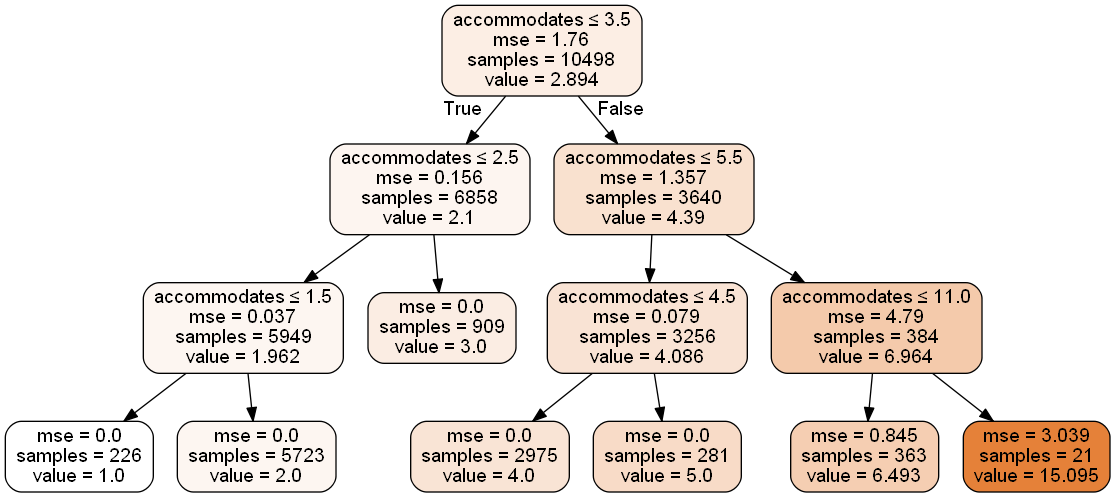

In [141]:
from IPython.display import Image
Image(graph.create_png())

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
from sklearn.ensemble import RandomForestRegressor

In [167]:
clf=RandomForestRegressor(n_estimators=80,oob_score=True,n_jobs=-1,max_features='sqrt',random_state=200)

In [168]:
clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                      oob_score=True, random_state=200, verbose=0,
                      warm_start=False)

In [169]:
clf.oob_score_

0.5482542501858187

In [170]:

for w in range(700,720,10):
    clf=RandomForestRegressor(n_estimators=w,oob_score=True,n_jobs=-1,random_state=200)
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 700
OOB score is 0.5462821027139386
************************
For n_estimators = 710
OOB score is 0.5463049820286563
************************


In [171]:
clf=RandomForestRegressor(n_estimators=600,oob_score=True,n_jobs=-1,max_features='sqrt',random_state=200)

In [172]:
clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
                      oob_score=True, random_state=200, verbose=0,
                      warm_start=False)

In [173]:
clf.oob_score_

0.5620878166645558

In [174]:
clf.feature_importances_

array([0.02243976, 0.18352997, 0.04894435, 0.12755268, 0.05827143,
       0.03648135, 0.06058377, 0.02418387, 0.1075029 , 0.1153932 ,
       0.12794799, 0.04115635, 0.03170457, 0.0007071 , 0.00674534,
       0.00685537])

In [175]:
imp_feat=pd.Series(clf.feature_importances_,index=X.columns.tolist())

In [176]:
imp_feat.sort_values(ascending=False)

accommodates                      0.183530
d_center                          0.127948
bedrooms                          0.127553
longitude                         0.115393
latitude                          0.107503
number_of_reviews                 0.060584
guests_included                   0.058271
bathrooms                         0.048944
room_type_Entire home/apt         0.041156
minimum_nights                    0.036481
room_type_Private room            0.031705
calculated_host_listings_count    0.024184
host_listings_count               0.022440
instant_bookable_t                0.006855
instant_bookable_f                0.006745
room_type_Shared room             0.000707
dtype: float64

In [177]:
clf.fit(X_test,y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
                      oob_score=True, random_state=200, verbose=0,
                      warm_start=False)

In [178]:
clf.oob_score_

0.5449730194898696

In [180]:
for w in range(30,600,10):
    clf=RandomForestRegressor(n_estimators=w,oob_score=True,n_jobs=-1,random_state=200)
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 30
OOB score is 0.5022782859204231
************************
For n_estimators = 40
OOB score is 0.5169866153479722
************************
For n_estimators = 50
OOB score is 0.5235673191860878
************************
For n_estimators = 60
OOB score is 0.5279823995095281
************************
For n_estimators = 70
OOB score is 0.5308756872535729
************************
For n_estimators = 80
OOB score is 0.5335383449227868
************************
For n_estimators = 90
OOB score is 0.5358699051358878
************************
For n_estimators = 100
OOB score is 0.5369319067156326
************************
For n_estimators = 110
OOB score is 0.5384574715245738
************************
For n_estimators = 120
OOB score is 0.539495102262675
************************
For n_estimators = 130
OOB score is 0.5406794510608305
************************
For n_estimators = 140
OOB score is 0.5410530533408784
************************
For n_estimators = 150
OOB score is 0.5413358779

In [181]:
for w in range(600,620,10):
    clf=RandomForestRegressor(n_estimators=w,oob_score=True,n_jobs=-1,random_state=200)
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')
    
    
    #but answer has to be 590 as the question mentions a range.

For n_estimators = 600
OOB score is 0.5465188527047603
************************
For n_estimators = 610
OOB score is 0.5466308374832287
************************


In [182]:
clf=RandomForestRegressor(n_estimators=600,oob_score=True,n_jobs=-1,max_features='sqrt',random_state=200)

clf.fit(X_train,y_train)

clf.oob_score_

clf.feature_importances_

imp_feat=pd.Series(clf.feature_importances_,index=X.columns.tolist())

imp_feat.sort_values(ascending=False)

accommodates                      0.183530
d_center                          0.127948
bedrooms                          0.127553
longitude                         0.115393
latitude                          0.107503
number_of_reviews                 0.060584
guests_included                   0.058271
bathrooms                         0.048944
room_type_Entire home/apt         0.041156
minimum_nights                    0.036481
room_type_Private room            0.031705
calculated_host_listings_count    0.024184
host_listings_count               0.022440
instant_bookable_t                0.006855
instant_bookable_f                0.006745
room_type_Shared room             0.000707
dtype: float64

In [183]:
RFR_Final=RandomForestRegressor(oob_score=True,n_jobs=-1,n_estimators=570,random_state=200,max_features="sqrt")
RFR_Final.fit(X_train,y_train)
oob_Final=RFR_Final.oob_score_


In [184]:
RFR_feat=pd.Series(RFR_Final.feature_importances_,index=X_train.columns.tolist())


In [185]:
RFR_feat.sort_values(ascending=False)


accommodates                      0.182683
bedrooms                          0.128035
d_center                          0.127749
longitude                         0.115524
latitude                          0.107511
number_of_reviews                 0.060581
guests_included                   0.058462
bathrooms                         0.048958
room_type_Entire home/apt         0.040843
minimum_nights                    0.036537
room_type_Private room            0.032156
calculated_host_listings_count    0.024155
host_listings_count               0.022482
instant_bookable_t                0.006844
instant_bookable_f                0.006770
room_type_Shared room             0.000708
dtype: float64

In [186]:
rf_test=RFR_Final.fit(X_test,y_test)


In [187]:
oob_Final=RFR_Final.oob_score_


In [188]:
oob_Final=RFR_Final.oob_score_


In [189]:
oob_Final


0.5452051729551854

In [190]:
prdict=RFR_Final.predict(X_test)


In [191]:
prdict


array([ 72.53333333, 154.54035088, 141.39122807, ..., 115.97719298,
        99.21403509, 112.66842105])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


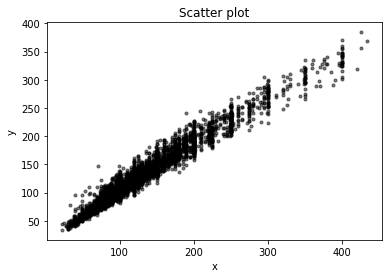

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [194]:
import matplotlib.pyplot as plt
colors = (0,0,0)
area = np.pi*3
plt.scatter(y_test,prdict, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.plot

In [193]:
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>